# Experiment 3: SDA and Hypothesis Testing
### Name: Nachiket Sankhe
### UID: 2019120053
### Class: BE EXTC

In [ ]:
import pandas as pd
import seaborn as sns
from statistics import variance
from statsmodels.stats.weightstats import ztest
sns.set(rc={'figure.figsize':(11.7,8.27)})

Importing the necessary libraries.

The dataset we are using here is the Spotify dataset for the year 2021 which contains all the songs released in that year. The target is whether the user will like the song or not.

The dataset contains attributes like name of the song, artist name, song duration, energy, acousticness, danceability, loudness, etc.

The scales for the audio related attributes go from 0 to 1.

In [ ]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Reading the data and displaying it.

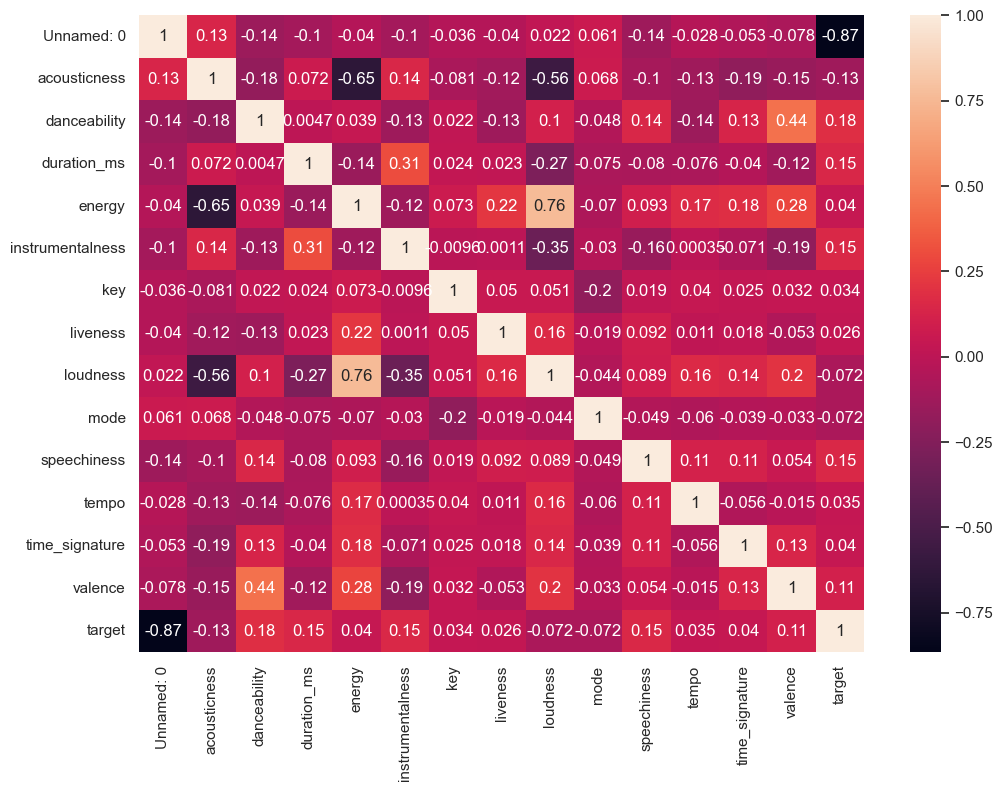

In [ ]:
sns.heatmap(data= data.corr(numeric_only=True), annot=True);

Plotting a heatmap to show the correlation of all the variables with each other.

In [ ]:
data.mean(numeric_only=True)

Unnamed: 0            1008.000000
acousticness             0.187590
danceability             0.618422
duration_ms         246306.197323
energy                   0.681577
instrumentalness         0.133286
key                      5.342588
liveness                 0.190844
loudness                -7.085624
mode                     0.612295
speechiness              0.092664
tempo                  121.603272
time_signature           3.968270
valence                  0.496815
target                   0.505702
dtype: float64

Computed the mean values of all numeric attributes in the dataset.

We can observe that the mean of energy column in 0.68, which means that majority of th songs released in 2021 were very upbeat and energetic.

The mean song duration was also just above 4 minutes.



In [ ]:
data.median(numeric_only=True)

Unnamed: 0            1008.000000
acousticness             0.063300
danceability             0.631000
duration_ms         229261.000000
energy                   0.715000
instrumentalness         0.000076
key                      6.000000
liveness                 0.127000
loudness                -6.248000
mode                     1.000000
speechiness              0.054900
tempo                  121.427000
time_signature           4.000000
valence                  0.492000
target                   1.000000
dtype: float64

Computed the medians of all numeric attributes.

There is a slight deviation between the medians of energy, song duration, danceability and their means. This indicates that most of the newer released songs are very upbeat and energetic in nature.

In [ ]:
data.mode()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.119,0.683,192000.0,0.857,0.0,1.0,0.101,-5.379,1.0,0.0378,99.995,4.0,0.160,1.0,Jack,Drake
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1020,119.999,NaN,0.372,NaN,River,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.990,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.966,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Computed the modes of all attributes in the dataset.

We can observe that Drake had the highest number of song releases in 2021.

The mode for song duration is at 192 seconds which is a significant gap from its mode and median.

In [ ]:
data.skew(numeric_only=True)

Unnamed: 0          0.000000
acousticness        1.658393
danceability       -0.419610
duration_ms         2.499012
energy             -0.913010
instrumentalness    1.952755
key                -0.009360
liveness            1.952703
loudness           -2.226556
mode               -0.461301
speechiness         2.309581
tempo               0.439058
time_signature     -2.234521
valence             0.078390
target             -0.022825
dtype: float64

Computed the skewness of each numeric attribute in the dataset.

Positive value of skewness indicates an asymmetric normal distribution leaning towards the right.

Negative value of skewness indicates an asymmetric normal distribution leaning towards the left.

The skewness of danceability, temp, key, valence and mode are closest to 0, which indicates that they have an almost ideal normal distribution.

In [ ]:
variance(data['energy'])

0.04421473828192014

Computed the variance for the energy rating of songs.

Variance describes the spread of data in the dataset. Higher variance indicates a larger spread relative to the mean.

As the variance observed above is low, we can say that the data is not spread far from the mean of the energy attribute.

In [ ]:
variance(data['duration_ms'])

6721017862.644576

We have computed the variance of song duration above.

The very high value indicates the song durations vary largely in the dataset.

### Z Test

In [ ]:
alpha = 0.05
null_hypo = 0.618422

test_data = data['danceability'].sample(100)

z_score, p_value = ztest(test_data, value=null_hypo, alternative='larger')

print('Significance Level: {}'.format(alpha))
print('Obtained p-value: {}'.format(p_value))

if(p_value < alpha):
  print('Reject Null Hypothesis')
else:
  print('Fail to Reject Null Hypothesis')

Significance Level: 0.05
Obtained p-value: 0.10468832145626594
Fail to Reject Null Hypothesis


Performed a Z test on the danceability attribute for songs.

The Null Hypothesis (H<sub>0</sub>) states that mean is 0.618422

The Alternative Hypothesis (H<sub>1</sub>) states that mean is greater than 0.618422

We have assumed the significance level to be 5% for this test.

We are drawing a sample of size 100 from the population to perform this test.

As we can see, the significance level is lesser than the p-value which justifies why we Fail to Reject the Null Hypothesis.